<a href="https://colab.research.google.com/github/renaldoaluska/pba2025gasal/blob/main/PBA_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INITIAL REQUIREMENTS
WEEK 2: Data Scrapping Application (1), Data Preprocessing Application: Frequent Word Analysis (2) Bertokenizer (Stopword removal/ Stopword customs (WEEK2 RECAP) (3)

In [1]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

# DATA SCRAPPING

## GPlay Scrapper

In [2]:
#Android App TransJogja  from Google Play at
#https://play.google.com/store/apps/details?id=ngi.transjogja.apppublic&hl=id
#ID Apps:
#The apps ID found in the link after id=ngi.transjogja.apppublic

from google_play_scraper import app, Sort, reviews_all

transjog_reviews = reviews_all(
    'ngi.transjogja.apppublic',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [3]:
transjog_reviews[:3]

[{'reviewId': '01033233-abfb-40de-8e00-298f9b01b3c1',
  'userName': 'si gemplon',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocJQ1GuuJ0O8BtDbuPYyn6elBLBhLzWV5KDewTcNB7eE8_uCtA=mo',
  'content': 'aplikasi nya okk... tp terkadang pelayanan msh krg ramah terutama petugas perempuan....apalagi klo sdh mau ganti sift.. 🙏🙏🙏',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': None,
  'at': datetime.datetime(2025, 9, 6, 4, 18, 22),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': None},
 {'reviewId': 'daf82d9c-4834-4cfe-b336-aba6f8f5c5b0',
  'userName': 'Rahmat Karyawan',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjUvvZz1fZgbHaziF4UEK4UNJLLXdk6r_tqx-dCUjAAmT7SvIrw',
  'content': 'sangat sangat membantu saya sebagai pendatang baru di Daerah Istimewa Yogyakarta. Terima kasih atas bantuannya.',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.3.5',
  'at': datetime.datetime(2025, 9, 3, 7, 21, 18),
  'replyContent': None,
 

## Ethics: sensor userName

In [4]:
# Lakukan iterasi dan ubah 'userName'
# Ini adalah cara yang paling efisien menggunakan list comprehension
reviews_tersensor = [
    {**review, 'userName': 'Pengguna Google'} for review in transjog_reviews
]

# Sekarang, 'reviews_tersensor' berisi data yang sama,
# tapi semua nama pengguna sudah diubah.

# Mari kita lihat perbedaannya
if transjog_reviews:
    print("--- DATA ASLI ---")
    print(f"Username: {transjog_reviews[0]['userName']}")
    print(f"Review: {transjog_reviews[0]['content']}\n")

if reviews_tersensor:
    print("--- DATA SETELAH DISENSOR ---")
    print(f"Username: {reviews_tersensor[0]['userName']}")
    print(f"Review: {reviews_tersensor[0]['content']}")

--- DATA ASLI ---
Username: si gemplon
Review: aplikasi nya okk... tp terkadang pelayanan msh krg ramah terutama petugas perempuan....apalagi klo sdh mau ganti sift.. 🙏🙏🙏

--- DATA SETELAH DISENSOR ---
Username: Pengguna Google
Review: aplikasi nya okk... tp terkadang pelayanan msh krg ramah terutama petugas perempuan....apalagi klo sdh mau ganti sift.. 🙏🙏🙏


## Into dataframe

In [5]:
#Save TransJogja reviews into dataframe
df_transjog = pd.DataFrame(np.array(reviews_tersensor),columns=['content'])
df_transjog = df_transjog.join(pd.DataFrame(df_transjog.pop('content').tolist()))
df_transjog

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,01033233-abfb-40de-8e00-298f9b01b3c1,Pengguna Google,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasi nya okk... tp terkadang pelayanan msh...,5,0,None,2025-09-06 04:18:22,None,NaT,None
1,daf82d9c-4834-4cfe-b336-aba6f8f5c5b0,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-U...,sangat sangat membantu saya sebagai pendatang ...,5,0,2.3.5,2025-09-03 07:21:18,None,NaT,2.3.5
2,c5451c37-5d56-4740-8724-fd723ce5986c,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-U...,"sangat membantu mobilitas. murah, nyaman",5,0,2.3.5,2025-09-02 03:55:16,None,NaT,2.3.5
3,e945d21b-b867-444a-9118-7c55cd352efc,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-U...,"mau login aja susah, karang suruh pake email t...",1,0,2.3.5,2025-09-01 00:18:48,None,NaT,2.3.5
4,9ff934d4-bcd3-4ad4-b813-9d103cd8d2ad,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-U...,Bisa Melihat bus terdekat di halte,5,0,2.3.5,2025-08-31 11:38:35,None,NaT,2.3.5
...,...,...,...,...,...,...,...,...,...,...,...
320,27d478d3-67b9-4fa6-99ca-1f779a50d042,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Work banget sih, wajar laah kalo banyak kendal...",5,0,1.0,2020-01-31 11:23:42,terima kasih kak.,2020-06-25 05:54:10,1.0
321,2c7359e3-c29b-4f75-8b8f-fd4c69715d60,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Inovasi pelayanan,5,0,None,2020-01-30 12:38:28,None,NaT,None
322,9fa31a1c-3c49-4bad-ad30-2203d9be5c02,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Install >> lihat instruksi >> harus login ? >>...,5,1,None,2020-01-30 08:57:06,None,NaT,None
323,83d95da2-316a-4bc2-b113-42d27b3c0663,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Update tji,4,1,1.0,2020-01-29 15:26:20,None,NaT,1.0


## Simpan csv raw

In [6]:

df_transjog.to_csv(r'df_transjog_raw.csv', index=False)

In [7]:
df_transjog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              325 non-null    object        
 1   userName              325 non-null    object        
 2   userImage             325 non-null    object        
 3   content               325 non-null    object        
 4   score                 325 non-null    int64         
 5   thumbsUpCount         325 non-null    int64         
 6   reviewCreatedVersion  258 non-null    object        
 7   at                    325 non-null    datetime64[ns]
 8   replyContent          12 non-null     object        
 9   repliedAt             12 non-null     datetime64[ns]
 10  appVersion            258 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 28.1+ KB


## Loc yang perlu saja

In [8]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
#df_analysis = df_transjog.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]
df_transjog.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,aplikasi nya okk... tp terkadang pelayanan msh...,5,0,None,2025-09-06 04:18:22,None,NaT
1,sangat sangat membantu saya sebagai pendatang ...,5,0,2.3.5,2025-09-03 07:21:18,None,NaT
2,"sangat membantu mobilitas. murah, nyaman",5,0,2.3.5,2025-09-02 03:55:16,None,NaT
3,"mau login aja susah, karang suruh pake email t...",1,0,2.3.5,2025-09-01 00:18:48,None,NaT
4,Bisa Melihat bus terdekat di halte,5,0,2.3.5,2025-08-31 11:38:35,None,NaT
...,...,...,...,...,...,...,...
320,"Work banget sih, wajar laah kalo banyak kendal...",5,0,1.0,2020-01-31 11:23:42,terima kasih kak.,2020-06-25 05:54:10
321,Inovasi pelayanan,5,0,None,2020-01-30 12:38:28,None,NaT
322,Install >> lihat instruksi >> harus login ? >>...,5,1,None,2020-01-30 08:57:06,None,NaT
323,Update tji,4,1,1.0,2020-01-29 15:26:20,None,NaT


## Cek score (rating)

In [9]:
#Check number of reviews scores
df_transjog['score'].value_counts()

,count
score,
5,159
1,66
4,38
3,33
2,29


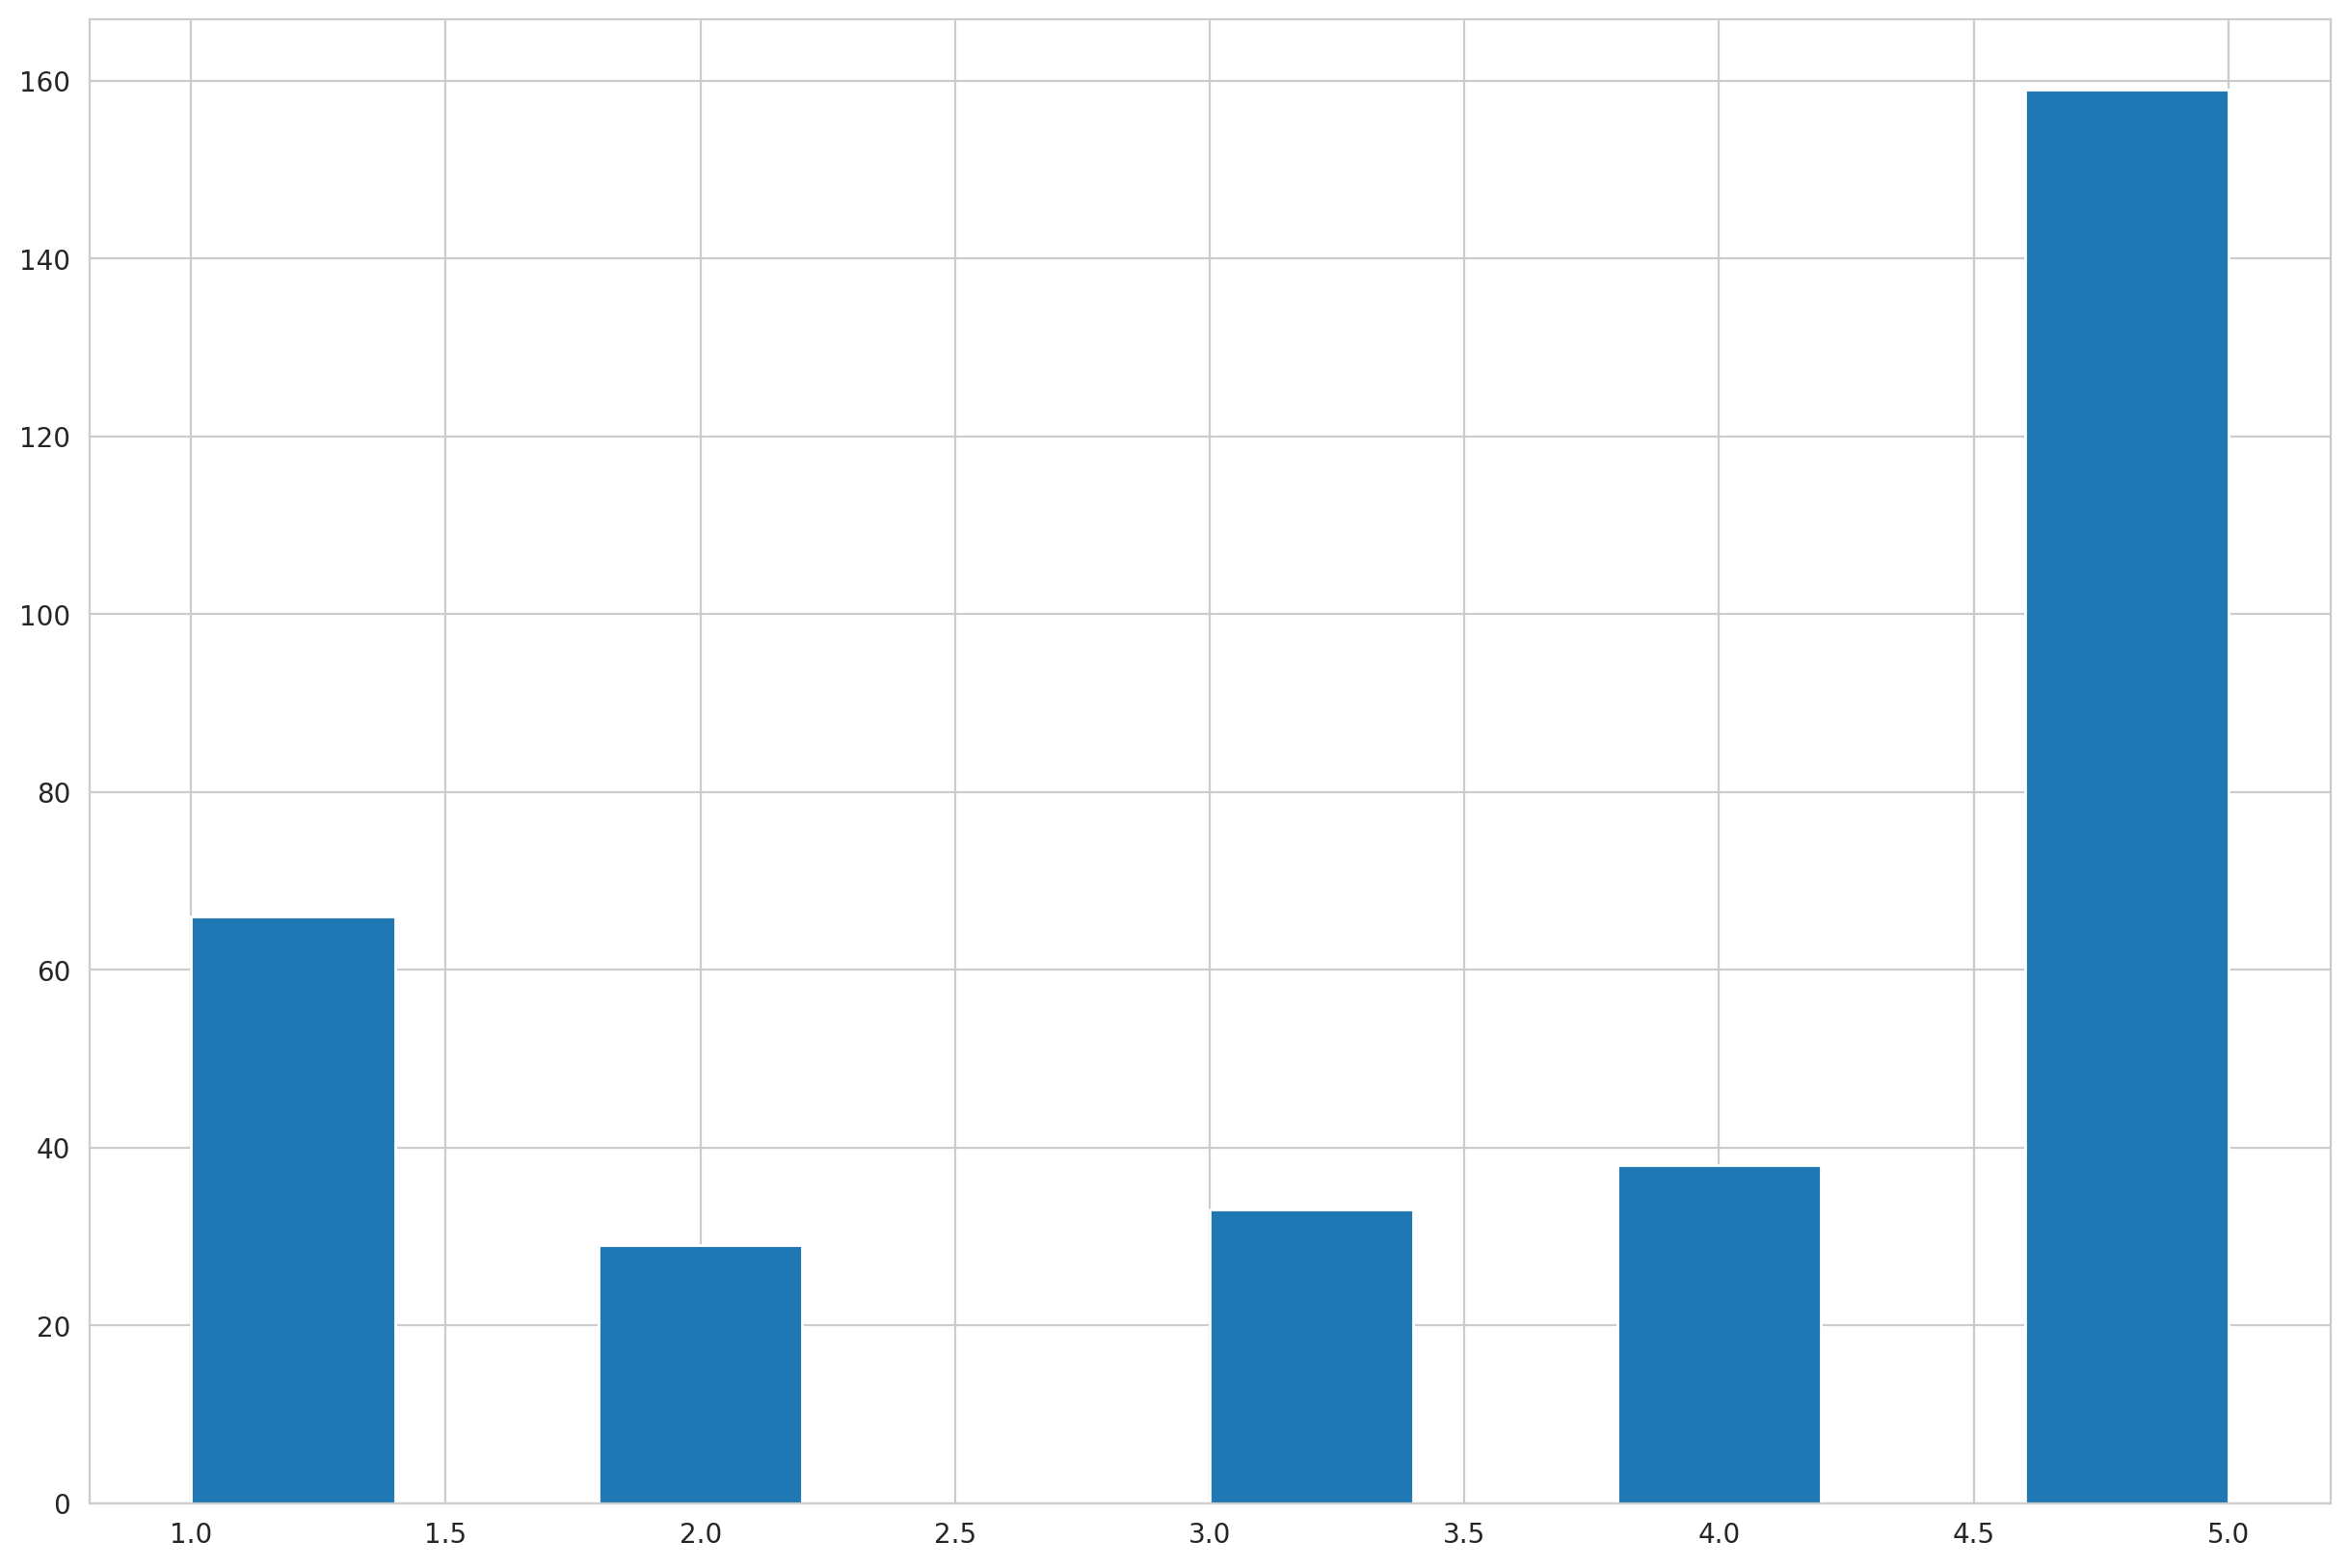

In [10]:
plt.hist(df_transjog['score'])
plt.show()

# DATA PREPROCESSING

## PEMROSESAN AWAL

### Hapus emoji

In [11]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

In [12]:
# Buat fungsi untuk menghapus emoji
def hapus_emoji(text):
  # Ganti emoji dengan string kosong ''
  return emoji.replace_emoji(text, replace='')

# Terapkan fungsi ke kolom yang berisi teks
df_transjog['content'] = df_transjog['content'].apply(hapus_emoji)

# Lihat hasilnya
print(df_transjog)

                                 reviewId         userName  \
0    01033233-abfb-40de-8e00-298f9b01b3c1  Pengguna Google   
1    daf82d9c-4834-4cfe-b336-aba6f8f5c5b0  Pengguna Google   
2    c5451c37-5d56-4740-8724-fd723ce5986c  Pengguna Google   
3    e945d21b-b867-444a-9118-7c55cd352efc  Pengguna Google   
4    9ff934d4-bcd3-4ad4-b813-9d103cd8d2ad  Pengguna Google   
..                                    ...              ...   
320  27d478d3-67b9-4fa6-99ca-1f779a50d042  Pengguna Google   
321  2c7359e3-c29b-4f75-8b8f-fd4c69715d60  Pengguna Google   
322  9fa31a1c-3c49-4bad-ad30-2203d9be5c02  Pengguna Google   
323  83d95da2-316a-4bc2-b113-42d27b3c0663  Pengguna Google   
324  021c984c-cbee-4700-bbdf-452b2fe36918  Pengguna Google   

                                                                                                                    userImage  \
0                           https://play-lh.googleusercontent.com/a/ACg8ocJQ1GuuJ0O8BtDbuPYyn6elBLBhLzWV5KDewTcNB7eE8_uCtA=mo 

### Jadiin lowercase

In [13]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_transjog['content'] = df_transjog['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_transjog['content'][90])
print(df_transjog['content'][1])
print(df_transjog['content'][50])

Rute nya diupdate dong, banyak bus yang rute nya beda sama di aplikasi.
sangat sangat membantu saya sebagai pendatang baru di Daerah Istimewa Yogyakarta. Terima kasih atas bantuannya.
Sekarang banyak Rite yang diubah dan ditiadakan, dulu saya sering menggunakan transportasi ini untuk pergi kekampus dan tempat lain lain tapi karena perubahan ini saya jadi jarang menggunakan. harapan saya semoga Transjogja bisa ditingkatkan lagi, ditambah jalur bukan malah seperti yang sekarang


In [14]:
#Lowercase all reviews to see the difference
df_transjog['content']= df_transjog['content'].apply(lambda x: x.lower())
print(df_transjog['content'][100])
print(df_transjog['content'][1])
print(df_transjog['content'][50])

sudah bagus, jalur sudah sinkron, gps bis juga sudah sinkron. saran, di bagian map untuk ikon bis bisa diberi tanda jalur.
sangat sangat membantu saya sebagai pendatang baru di daerah istimewa yogyakarta. terima kasih atas bantuannya.
sekarang banyak rite yang diubah dan ditiadakan, dulu saya sering menggunakan transportasi ini untuk pergi kekampus dan tempat lain lain tapi karena perubahan ini saya jadi jarang menggunakan. harapan saya semoga transjogja bisa ditingkatkan lagi, ditambah jalur bukan malah seperti yang sekarang


## NORMALISASI

,Word,Frequency
0,di,111
1,bus,77
2,sangat,73
3,dan,71
4,ada,66
5,tidak,64
6,saya,62
7,yang,61
8,untuk,59
9,bisa,57


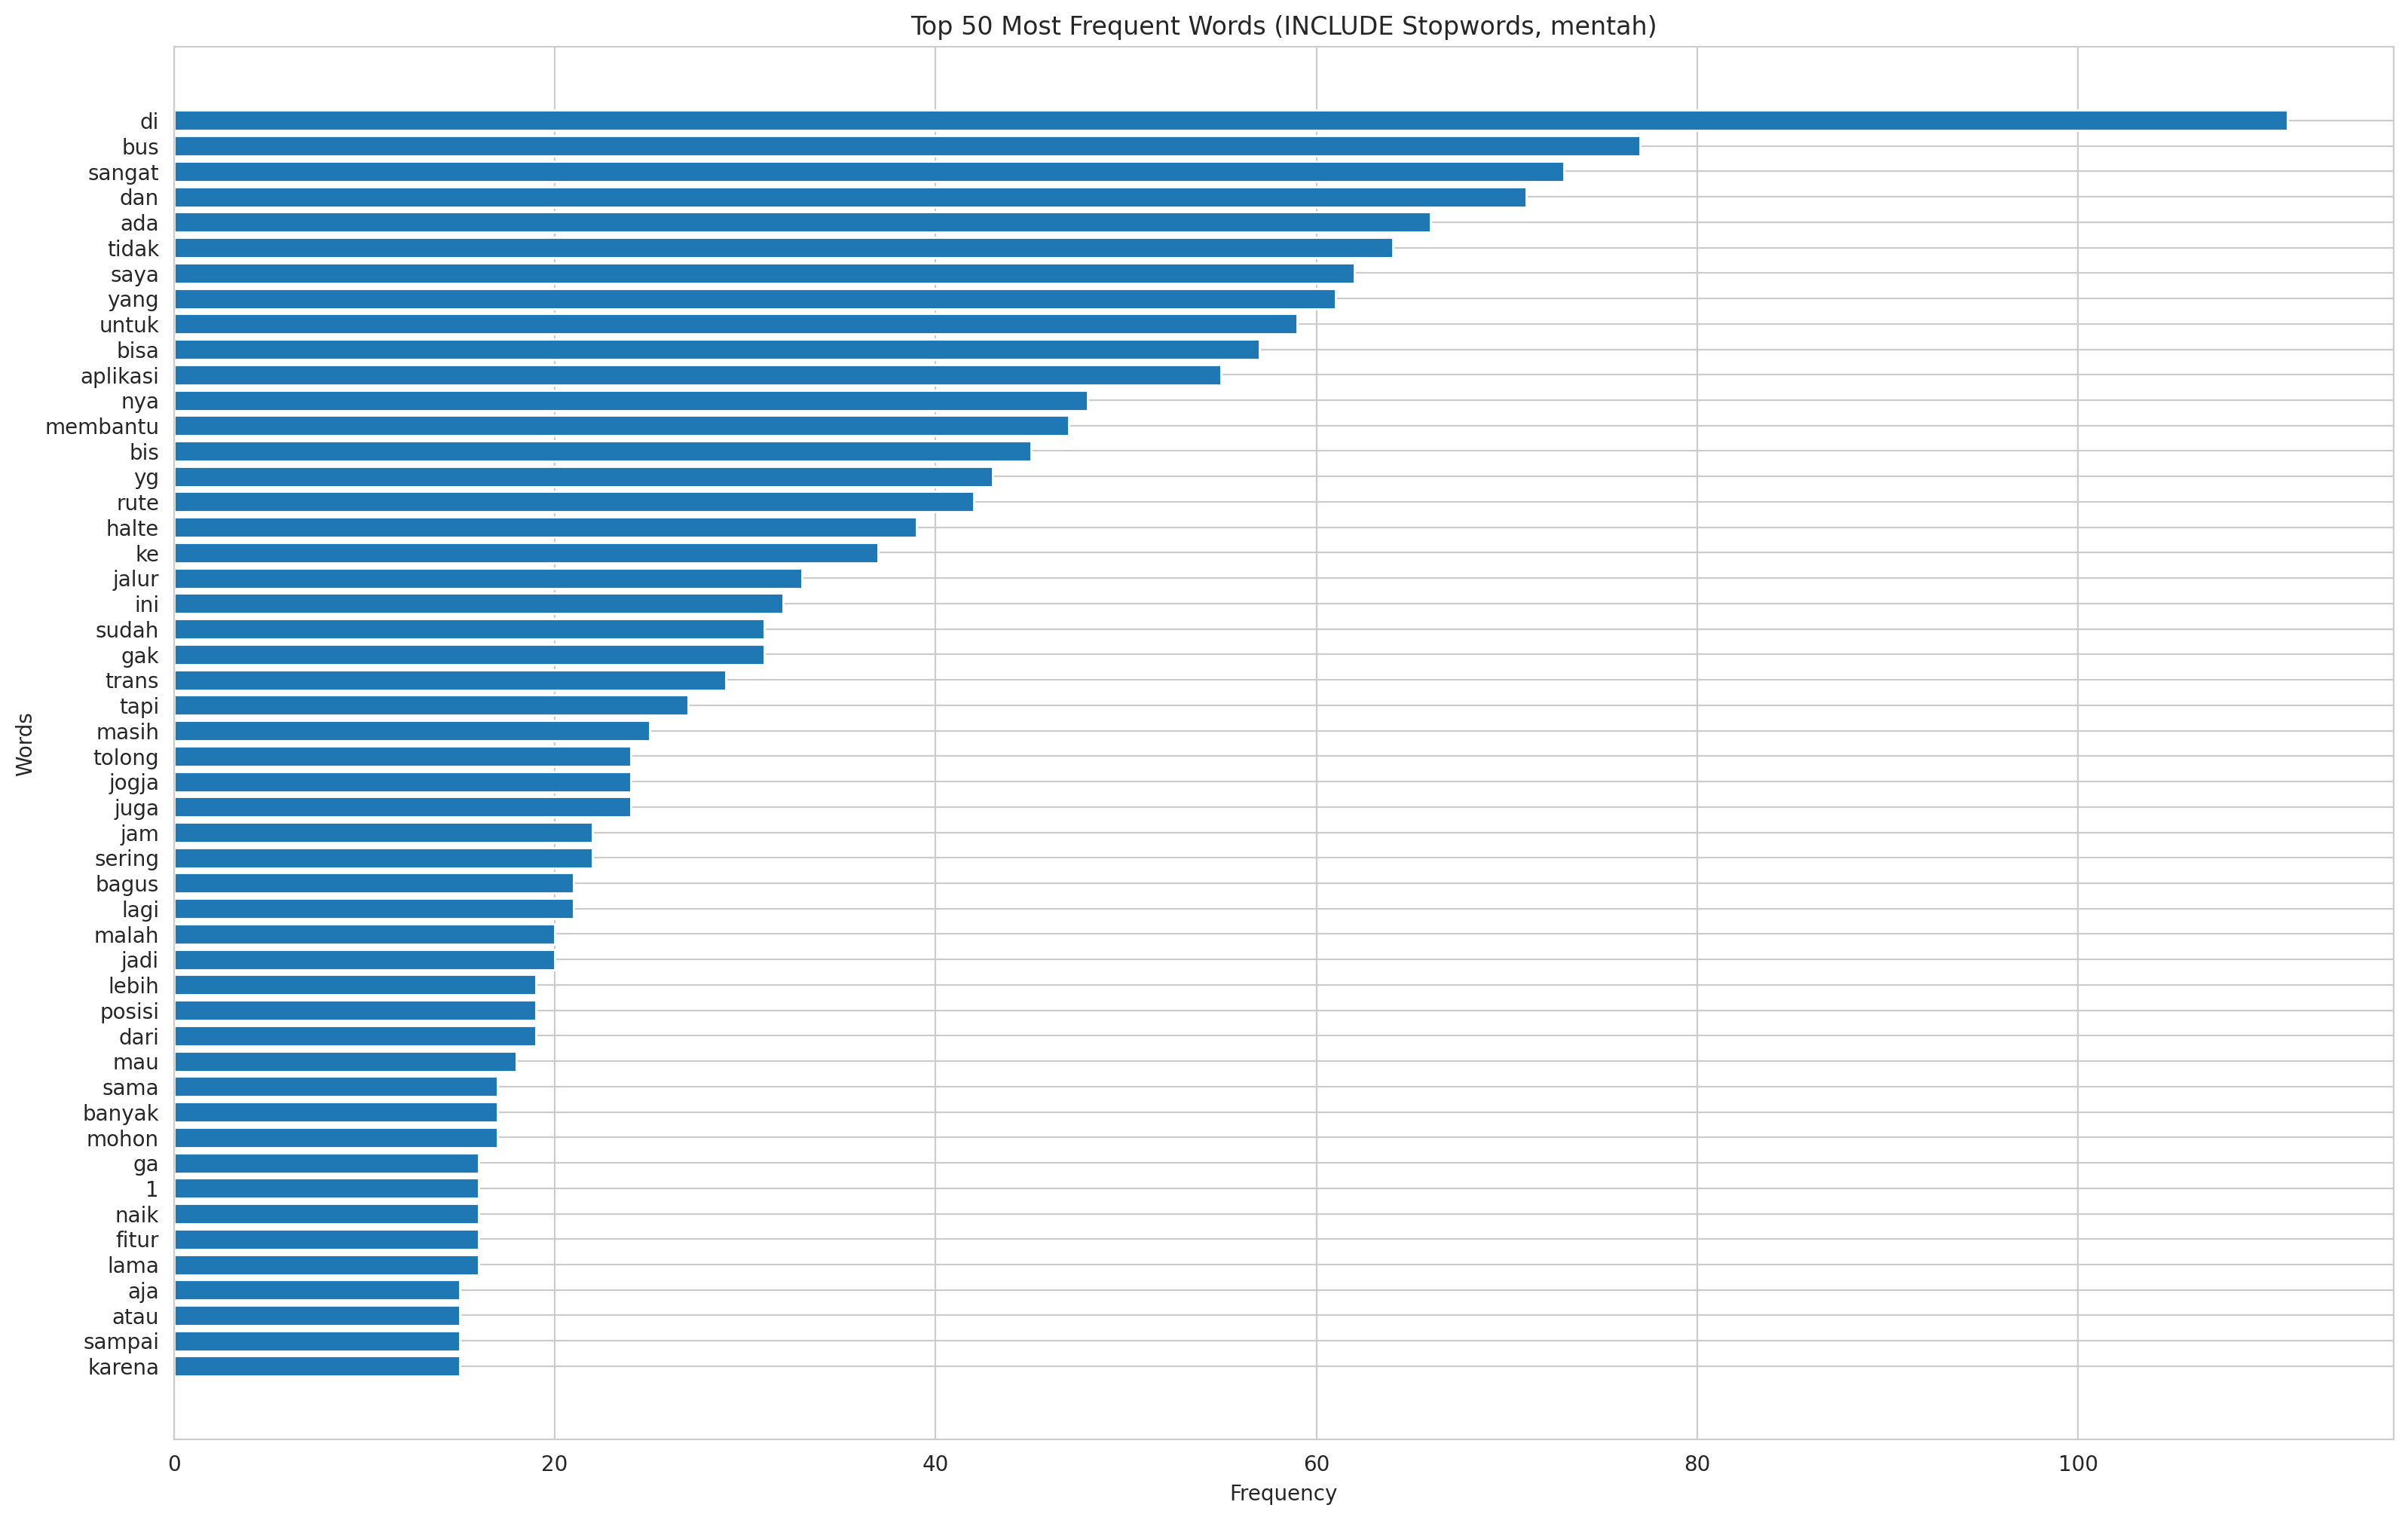

In [15]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
#filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(words)
common_words = word_counts.most_common(50)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Most Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()

In [16]:
import pandas as pd
import re
from collections import Counter

# Asumsikan Anda sudah memiliki DataFrame 'df_transjog' dengan kolom 'content'
# Contoh pembuatan DataFrame jika belum ada:
# data = {'content': ['Aplikasi bisnya error dan sering telat',
#                      'terima kasih, app ini sangat membantu. mantap!',
#                      'jadwal tj tidak akurat, mohon perbaiki']}
# df_transjog = pd.DataFrame(data)

# --- LANGKAH 1: PERSIAPAN (KAMUS NORMALISASI) ---

# Buat kamus untuk standardisasi, slang, dan singkatan
normalization_dict = {
    # Normalisasi Kata (termasuk variasi dengan imbuhan)
    r'\b(bis|bisnya|busnya)\b': 'bus',
    r'\b(aplikasinya|app)\b': 'aplikasi',
    r'\b(eror)\b': 'error',
    r'\b(nunggu)\b': 'menunggu',
    r'\b(trans|jogja|transjogja|tj|teje)\b': 'transjogja',

    # Penanganan Bahasa Gaul (Slang) & Singkatan
    r'\b(tau)\b': 'tahu',
    r'\b(gw|aku|sy|sya|gue|gua)\b': 'saya',
    r'\b(yaa|yh|yah)\b': 'ya',
    r'\b(teruus|trus|truss)\b': 'terus',
    r'\b(yg)\b': 'yang',
    r'\b(jgn)\b': 'jangan',
    r'\b(jg|juga|jga)\b': 'juga',
    r'\b(bs|bsa)\b': 'bisa',
    r'\b(bgt)\b': 'banget',
    r'\b(dgn)\b': 'dengan',
    r'\b(kdg)\b': 'kadang',
    r'\b(dlm)\b': 'dalam',
    r'\b(pake)\b': 'pakai',
    r'\b(dipakai)\b': 'dipakai',
    r'\b(liat)\b': 'lihat',
    r'\b(dr)\b': 'dari',
    r'\b(aj|aja)\b': 'saja',
    r'\b(kl|klo)\b': 'kalau',
    r'\b(sdh)\b': 'sudah',
    r'\b(msh)\b': 'masih',
    r'\b(krg)\b': 'kurang',
    r'\b(ts)\b': 'terus',
    r'\b(smpe|sampe)\b': 'sampai',
    r'\b(brarti)\b': 'berarti',
    r'\b(tak|tdk|ngga|gak|ga|gk|nggak|nggk|kaga|kagak)\b': 'tidak',
    r'\b(dh)\b': 'deh',
    r'\b(thx|trims|thanks)\b': 'terimakasih',
    r'\b(gblk)\b': 'goblok',
    r'\b(klo|kalo)\b': 'kalau',
    r'\b(apk|apl|aplksi|app|apps)\b': 'aplikasi',
    r'\b(tp)\b': 'tapi',
    r'\b(jd)\b': 'jadi'
}

# --- LANGKAH 2: BUAT FUNGSI PEMBERSIHAN ---

def clean_and_normalize(text):
    # 1. Ubah ke huruf kecil
    text = text.lower()

    # 2. Gabungkan frasa "terima kasih"
    text = re.sub(r'\b(terima kasih|terimakasih)\b', 'terimakasih', text)

    # 3. Terapkan kamus normalisasi menggunakan regex
    for pattern, replacement in normalization_dict.items():
        text = re.sub(pattern, replacement, text)

    # 4. Hapus semua tanda baca, simbol, dan angka
    text = re.sub(r'[^a-z\s]+', ' ', text)

    # 5. Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # 6. Normalisasi huruf ganda di akhir kata (misal: 'baguss' -> 'bagus' 'sekalii' -> 'sekali')
    text = re.sub(r'(.)\1\b', r'\1', text)

    # 7. (BARU) Koreksi akhiran 'ny' menjadi 'nya'
    text = re.sub(r'ny\b', 'nya', text)

    return text

# --- LANGKAH 3: TERAPKAN FUNGSI KE DATAFRAME ---

# Buat kolom baru untuk menyimpan teks yang sudah bersih
df_transjog['content_cleaned'] = df_transjog['content'].apply(clean_and_normalize)

print("--- CONTOH HASIL PEMBERSIHAN ---")
print(df_transjog[['content', 'content_cleaned']].head())
print("\n" + "="*50 + "\n")


# --- LANGKAH 4: ANALISIS ULANG FREKUENSI KATA ---

# Gabungkan semua teks bersih menjadi satu paragraf besar
all_text = ' '.join(df_transjog['content_cleaned'])

# Lakukan tokenisasi (memecah menjadi kata-kata)
tokens = all_text.split()

# Hitung frekuensi setiap kata
# Anda bisa menambahkan stopwords di sini jika perlu
# stopwords_indonesia = ['di', 'dan', 'yang', 'ini', 'itu', ...]
# tokens = [word for word in tokens if word not in stopwords_indonesia]

word_counts = Counter(tokens)

# Tampilkan 50 kata paling umum setelah dibersihkan
print("--- FREKUENSI KATA SETELAH DIBERSIHKAN (TOP 50) ---")
print(word_counts.most_common(50))

--- CONTOH HASIL PEMBERSIHAN ---
                                                                                                                                                                                      content  \
0                                                                    aplikasi nya okk... tp terkadang pelayanan msh krg ramah terutama petugas perempuan....apalagi klo sdh mau ganti sift..    
1                                                                             sangat sangat membantu saya sebagai pendatang baru di daerah istimewa yogyakarta. terima kasih atas bantuannya.   
2                                                                                                                                                    sangat membantu mobilitas. murah, nyaman   
3  mau login aja susah, karang suruh pake email tapi waktu dimasukin nama email dan sandinya malah akun sudah ada di perangkat anda, buat akun baru pun sama saja  trus aja gitu sampe kiamat   
4 

In [17]:
df_transjog['content'] = df_transjog['content'].apply(clean_and_normalize)
df_transjog

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_cleaned
0,01033233-abfb-40de-8e00-298f9b01b3c1,Pengguna Google,https://play-lh.googleusercontent.com/a/ACg8ocJQ1GuuJ0O8BtDbuPYyn6elBLBhLzWV5KDewTcNB7eE8_uCtA=mo,aplikasi nya ok tapi terkadang pelayanan masih kurang ramah terutama petugas perempuan apalagi kalau sudah mau ganti sift,5,0,None,2025-09-06 04:18:22,None,NaT,None,aplikasi nya ok tapi terkadang pelayanan masih kurang ramah terutama petugas perempuan apalagi kalau sudah mau ganti sift
1,daf82d9c-4834-4cfe-b336-aba6f8f5c5b0,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjUvvZz1fZgbHaziF4UEK4UNJLLXdk6r_tqx-dCUjAAmT7SvIrw,sangat sangat membantu saya sebagai pendatang baru di daerah istimewa yogyakarta terimakasih atas bantuannya,5,0,2.3.5,2025-09-03 07:21:18,None,NaT,2.3.5,sangat sangat membantu saya sebagai pendatang baru di daerah istimewa yogyakarta terimakasih atas bantuannya
2,c5451c37-5d56-4740-8724-fd723ce5986c,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjW1gU6QpN-g9xu2qJ3hQZ-FCh_jvdgMbpFTEU1TmCEQYJEP839X,sangat membantu mobilitas murah nyaman,5,0,2.3.5,2025-09-02 03:55:16,None,NaT,2.3.5,sangat membantu mobilitas murah nyaman
3,e945d21b-b867-444a-9118-7c55cd352efc,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjUalc2peFQZEwq2eQXcsSwiL3dhZX7c8wgqznee908flvtXUuYh,mau login saja susah karang suruh pakai email tapi waktu dimasukin nama email dan sandinya malah akun sudah ada di perangkat anda buat akun baru pun sama saja terus saja gitu sampai kiamat,1,0,2.3.5,2025-09-01 00:18:48,None,NaT,2.3.5,mau login saja susah karang suruh pakai email tapi waktu dimasukin nama email dan sandinya malah akun sudah ada di perangkat anda buat akun baru pun sama saja terus saja gitu sampai kiamat
4,9ff934d4-bcd3-4ad4-b813-9d103cd8d2ad,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjVTrpsQx7WipIOiq7dnjpUs0lGqjsS00DXIas6kmkBLDT-YuEnI,bisa melihat bus terdekat di halte,5,0,2.3.5,2025-08-31 11:38:35,None,NaT,2.3.5,bisa melihat bus terdekat di halte
...,...,...,...,...,...,...,...,...,...,...,...,...
320,27d478d3-67b9-4fa6-99ca-1f779a50d042,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,work banget sih wajar laah kalau banyak kendala masi baru jugak semangat dan kembangkan,5,0,1.0,2020-01-31 11:23:42,terima kasih kak.,2020-06-25 05:54:10,1.0,work banget sih wajar laah kalau banyak kendala masi baru jugak semangat dan kembangkan
321,2c7359e3-c29b-4f75-8b8f-fd4c69715d60,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,inovasi pelayanan,5,0,None,2020-01-30 12:38:28,None,NaT,None,inovasi pelayanan
322,9fa31a1c-3c49-4bad-ad30-2203d9be5c02,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,instal lihat instruksi harus login uninstal,5,1,None,2020-01-30 08:57:06,None,NaT,None,instal lihat instruksi harus login uninstal
323,83d95da2-316a-4bc2-b113-42d27b3c0663,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,update tji,4,1,1.0,2020-01-29 15:26:20,None,NaT,1.0,update tji


## TOKENIZATION & STOPWORD REMOVAL

### Download, new column

In [18]:
import nltk
from nltk.tokenize import word_tokenize

# pastikan resource punkt udah ada
nltk.download('punkt_tab')

# bikin kolom baru 'tokens' hasil tokenisasi
df_transjog['tokens'] = df_transjog['content'].apply(word_tokenize)

# cek hasilnya
print(df_transjog[['content', 'tokens']].head(10))

                                                                                                                                                                                        content  \
0                                                                     aplikasi nya ok tapi terkadang pelayanan masih kurang ramah terutama petugas perempuan apalagi kalau sudah mau ganti sift   
1                                                                                  sangat sangat membantu saya sebagai pendatang baru di daerah istimewa yogyakarta terimakasih atas bantuannya   
2                                                                                                                                                        sangat membantu mobilitas murah nyaman   
3  mau login saja susah karang suruh pakai email tapi waktu dimasukin nama email dan sandinya malah akun sudah ada di perangkat anda buat akun baru pun sama saja terus saja gitu sampai kiamat   
4                        

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Freq words

In [19]:
# function to plot most frequent terms
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    # Import FreqDist from nltk.probability
    from nltk.probability import FreqDist
    fdist = FreqDist(all_words)

    words_df = pd.DataFrame({
        'word': list(fdist.keys()),
        'count': list(fdist.values())
    })

    # selecting top N most frequent words
    d = words_df.nlargest(columns="count", n=terms)

    plt.figure(figsize=(20, 5))
    # Use the 'rainbow' colormap for the bar plot
    ax = sns.barplot(data=d, x="word", y="count")
    # , palette="rainbow"
    ax.set(ylabel='Count')

    # Tambahin title
    plt.title(f"Most Frequent Words (Before Stop Words Removal) - Top {terms}")

    plt.show()

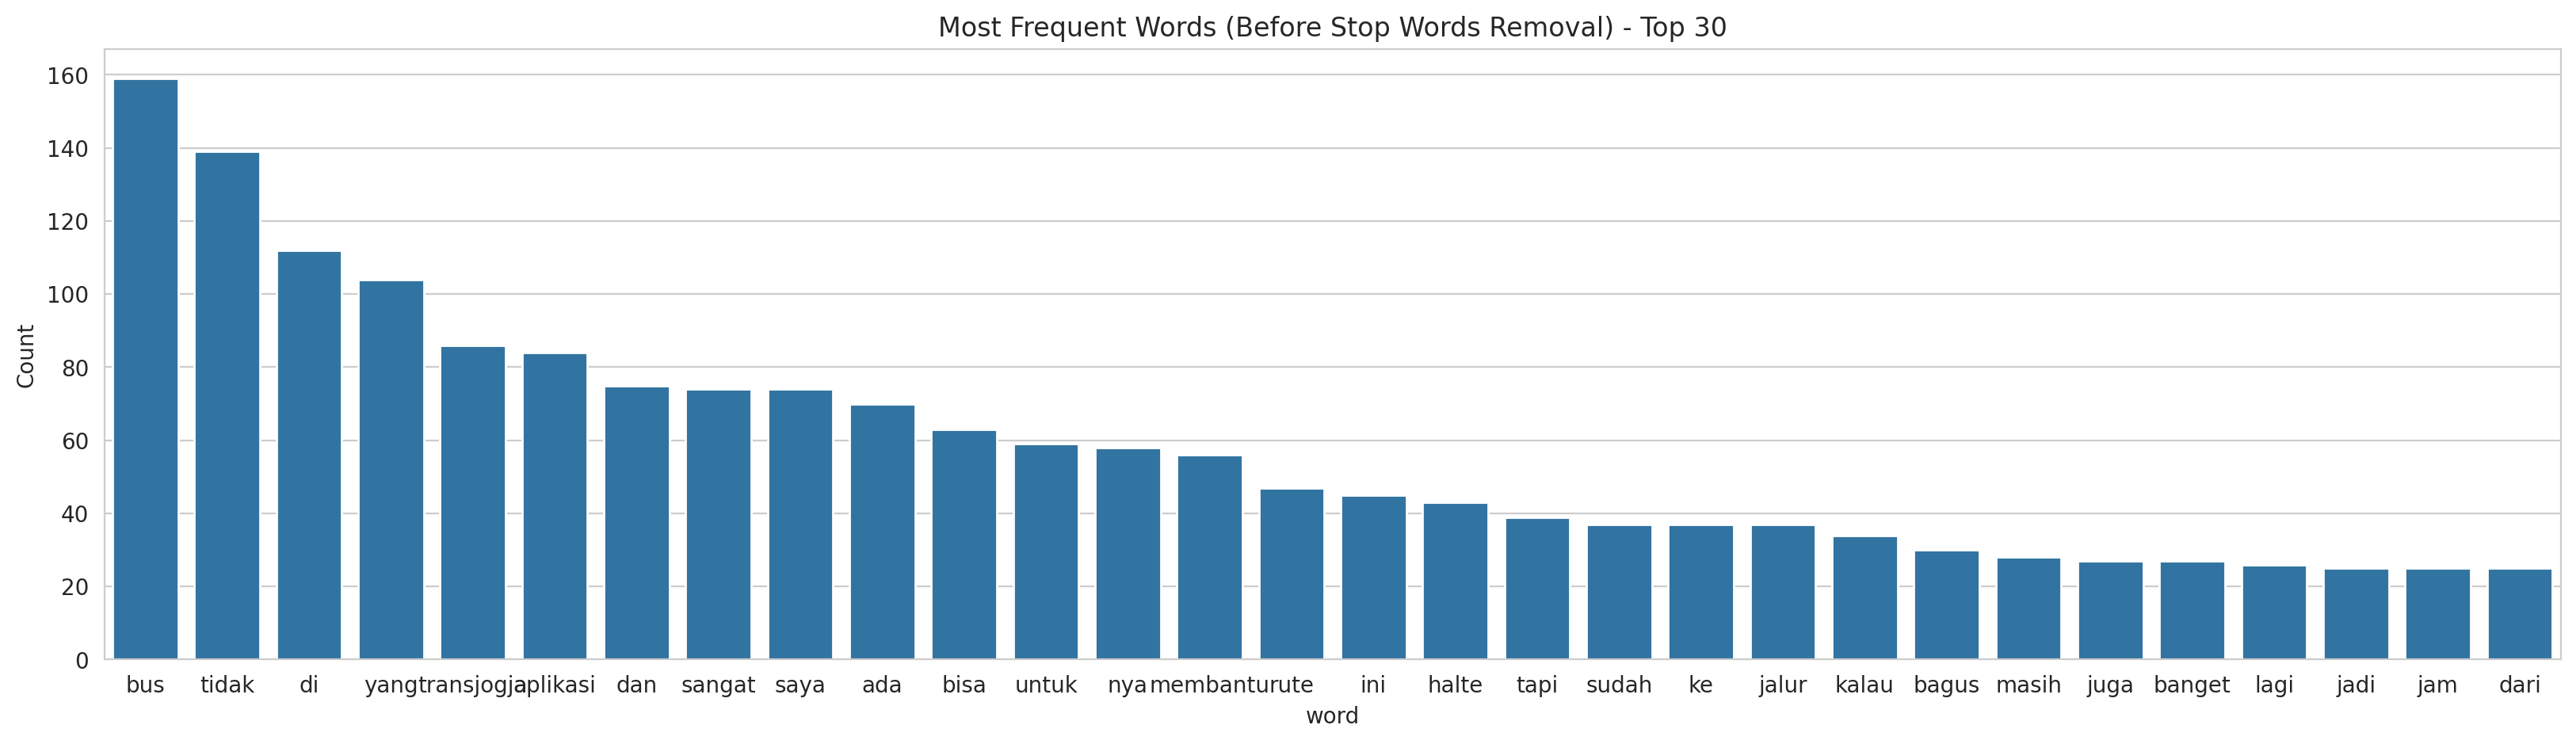

In [20]:
freq_words(df_transjog['content'])

### Indonesian stopwords

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
print(len(indonesian_stopwords))

758


### Freq words excluding stopwords

,Word,Frequency
0,bus,159
1,transjogja,86
2,aplikasi,84
3,nya,58
4,membantu,56
5,rute,47
6,halte,43
7,jalur,37
8,bagus,30
9,banget,27


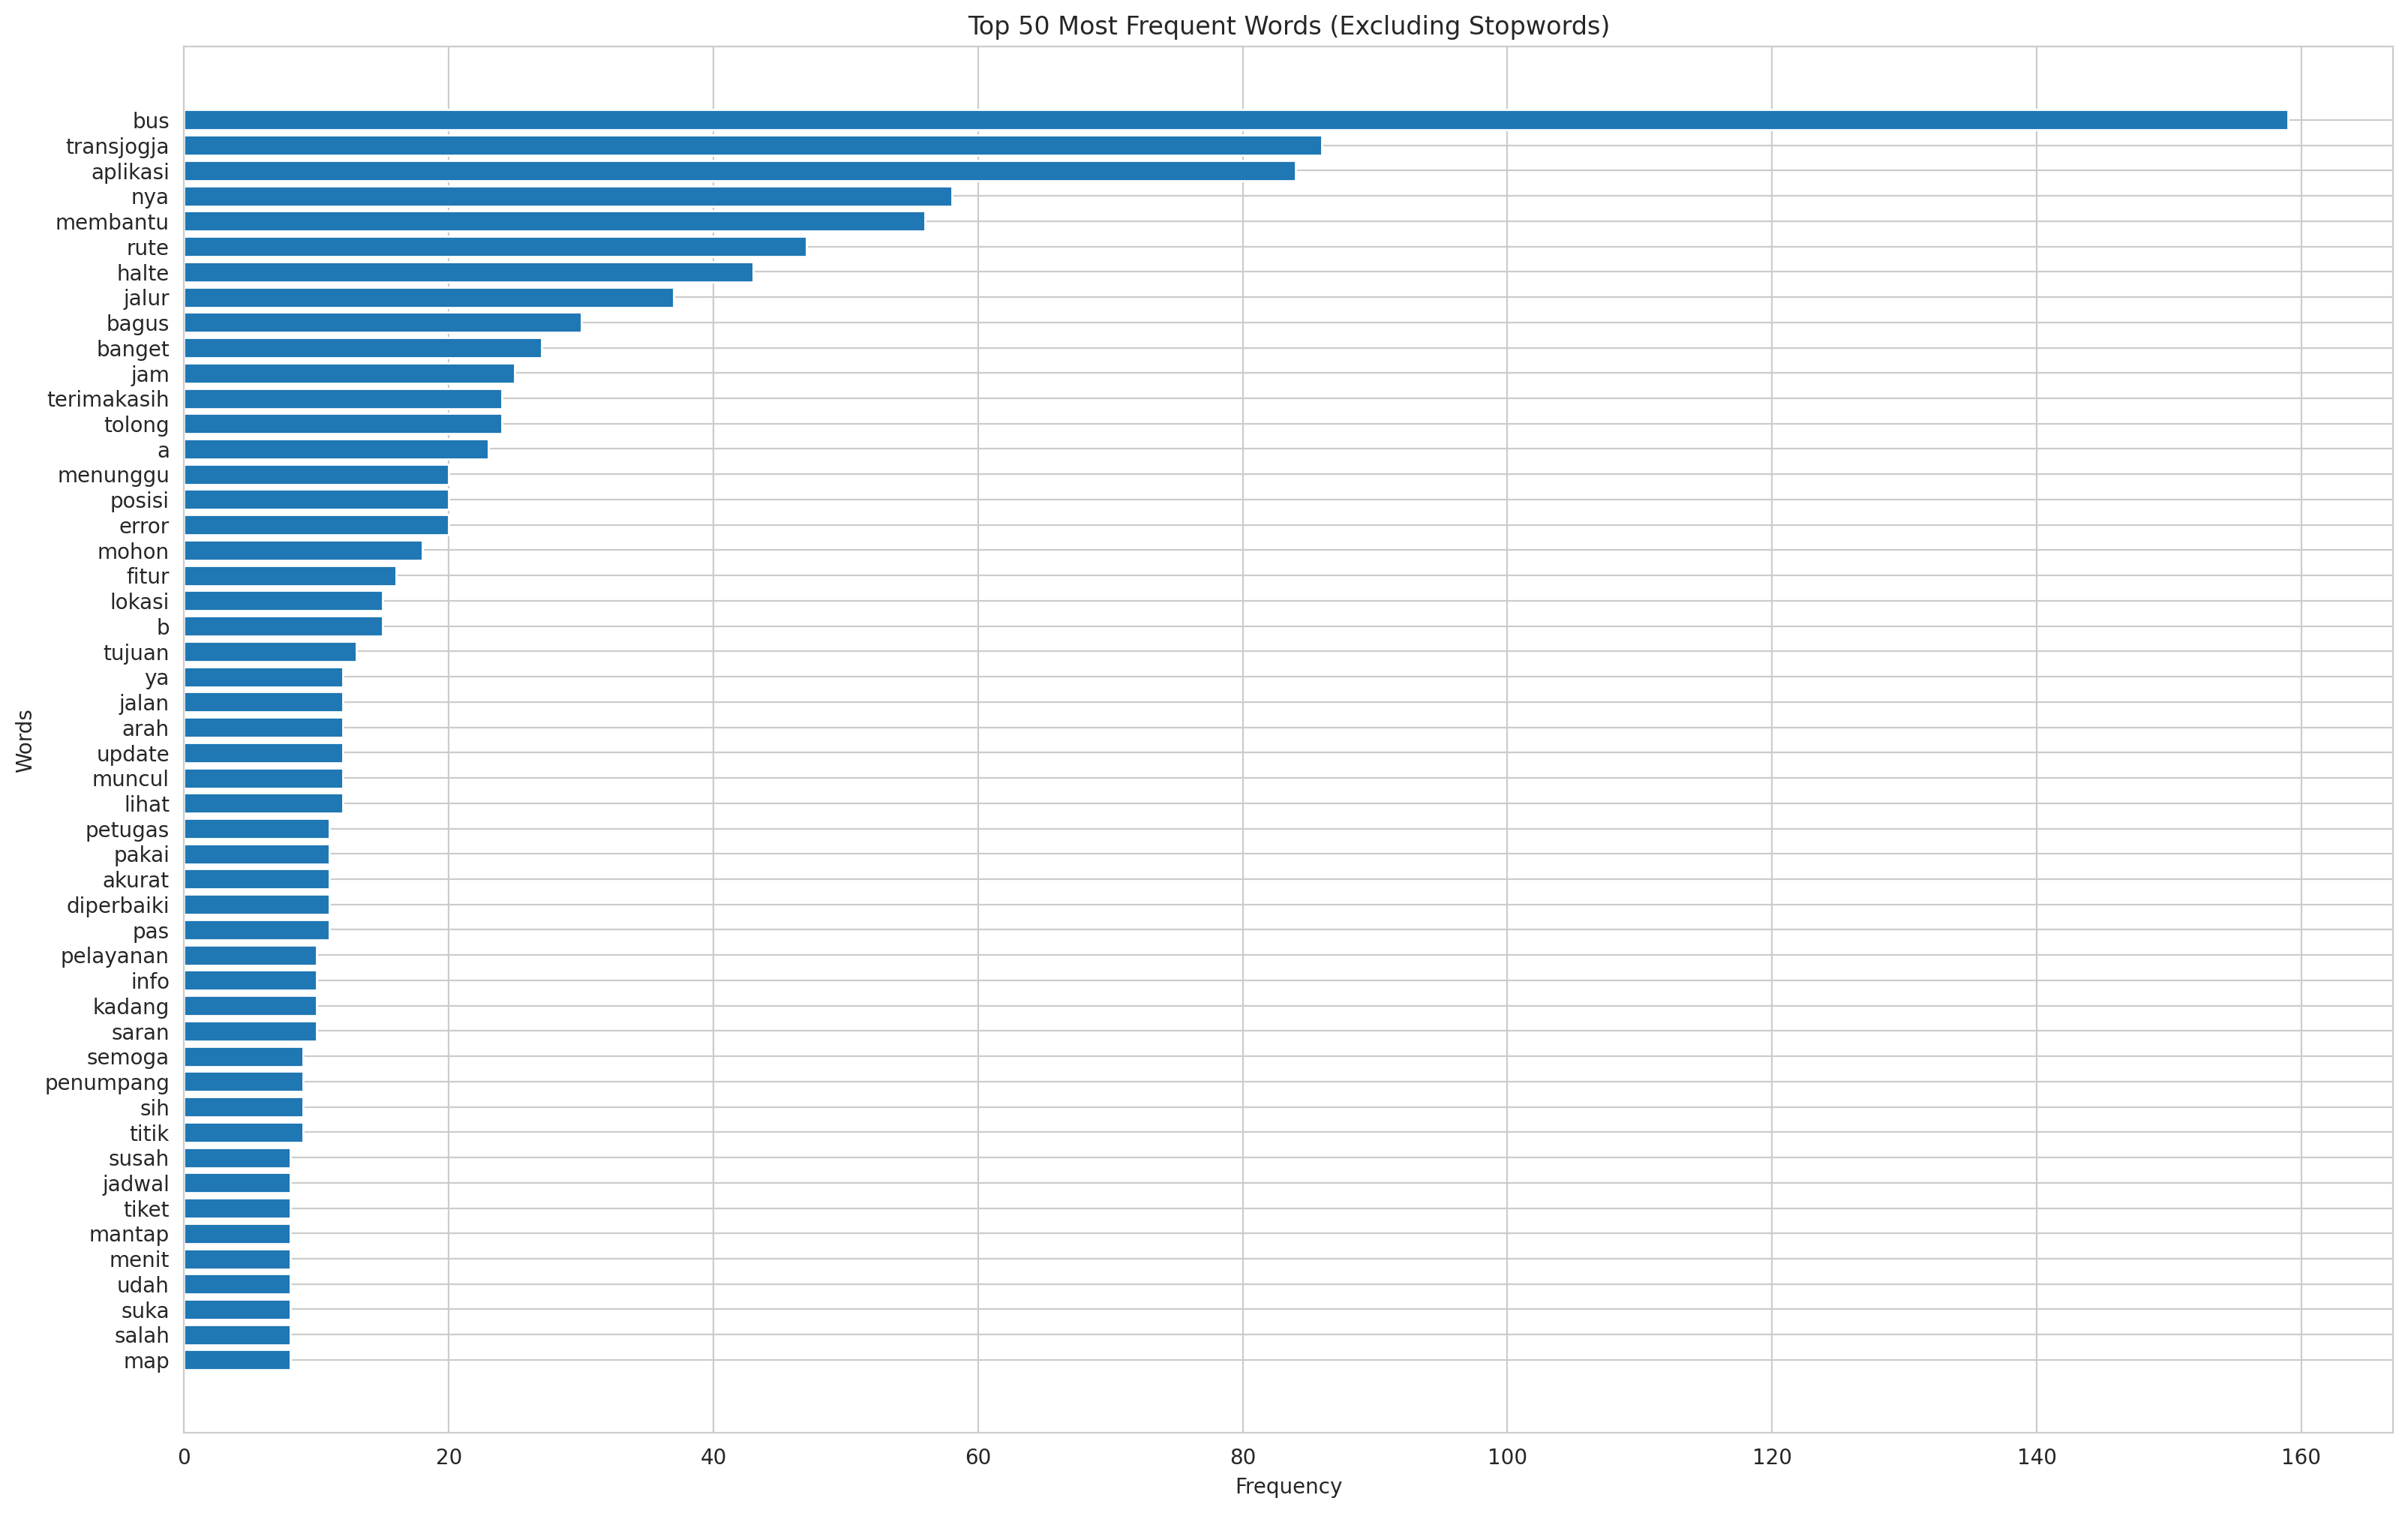

In [23]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(50)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Most Frequent Words (Excluding Stopwords)")
plt.show()

### Cek common words

In [24]:
common_words

[('bus', 159),
 ('transjogja', 86),
 ('aplikasi', 84),
 ('nya', 58),
 ('membantu', 56),
 ('rute', 47),
 ('halte', 43),
 ('jalur', 37),
 ('bagus', 30),
 ('banget', 27),
 ('jam', 25),
 ('terimakasih', 24),
 ('tolong', 24),
 ('a', 23),
 ('menunggu', 20),
 ('posisi', 20),
 ('error', 20),
 ('mohon', 18),
 ('fitur', 16),
 ('lokasi', 15),
 ('b', 15),
 ('tujuan', 13),
 ('ya', 12),
 ('jalan', 12),
 ('arah', 12),
 ('update', 12),
 ('muncul', 12),
 ('lihat', 12),
 ('petugas', 11),
 ('pakai', 11),
 ('akurat', 11),
 ('diperbaiki', 11),
 ('pas', 11),
 ('pelayanan', 10),
 ('info', 10),
 ('kadang', 10),
 ('saran', 10),
 ('semoga', 9),
 ('penumpang', 9),
 ('sih', 9),
 ('titik', 9),
 ('susah', 8),
 ('jadwal', 8),
 ('tiket', 8),
 ('mantap', 8),
 ('menit', 8),
 ('udah', 8),
 ('suka', 8),
 ('salah', 8),
 ('map', 8)]

### Custom stopwords

In [25]:
# Pastikan indonesian_stopwords berbentuk set
indonesian_stopwords = set(indonesian_stopwords)

# Add custom stopwords dari hasil top 100 frequent words
custom_stopwords = {
    # filler umum
    "saya","ya","kok","mah","loh","lho","pls","please","ny","nya","deh","juga","yang", "sih"
    #"ga", "gak", "gk", "udah", "udh", "aja", "ya", "tp", "bgt", "ok", "gw", "sih",
    # kata ganti/partikel
    #"nya", "yg", "kalo", "d", "in",
    # tanda baca/angka
    #",", ".", "1", "2","&"
    # umum tidak bermakna kontekstual
    #"aja", "mulu", "udah", "udh", "sampe",
    # terkait servis
    #"transjogja","bus"
    #"bus","bis","aplikasi"
}


# Pastikan kata-kata penting tidak ikut jadi stopwords
for word in ["luar", "biasa", "baik","tepat"]:
    indonesian_stopwords.discard(word)

# Merge with existing stopwords
indonesian_stopwords.update(custom_stopwords)

print("Updated stopwords:", sorted(indonesian_stopwords))

Updated stopwords: ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'be

### Freq words excluding custom stopwords

Words removed by custom stopwords:


,Word,Frequency
0,tidak,139
1,di,112
2,yang,104
3,dan,75
4,sangat,74
...,...,...
249,sini,1
250,sejauh,1
251,sebaiknya,1
252,antara,1


,Word,Frequency
0,bus,159
1,transjogja,86
2,aplikasi,84
3,membantu,56
4,rute,47
...,...,...
95,server,5
96,warna,5
97,ok,4
98,daerah,4


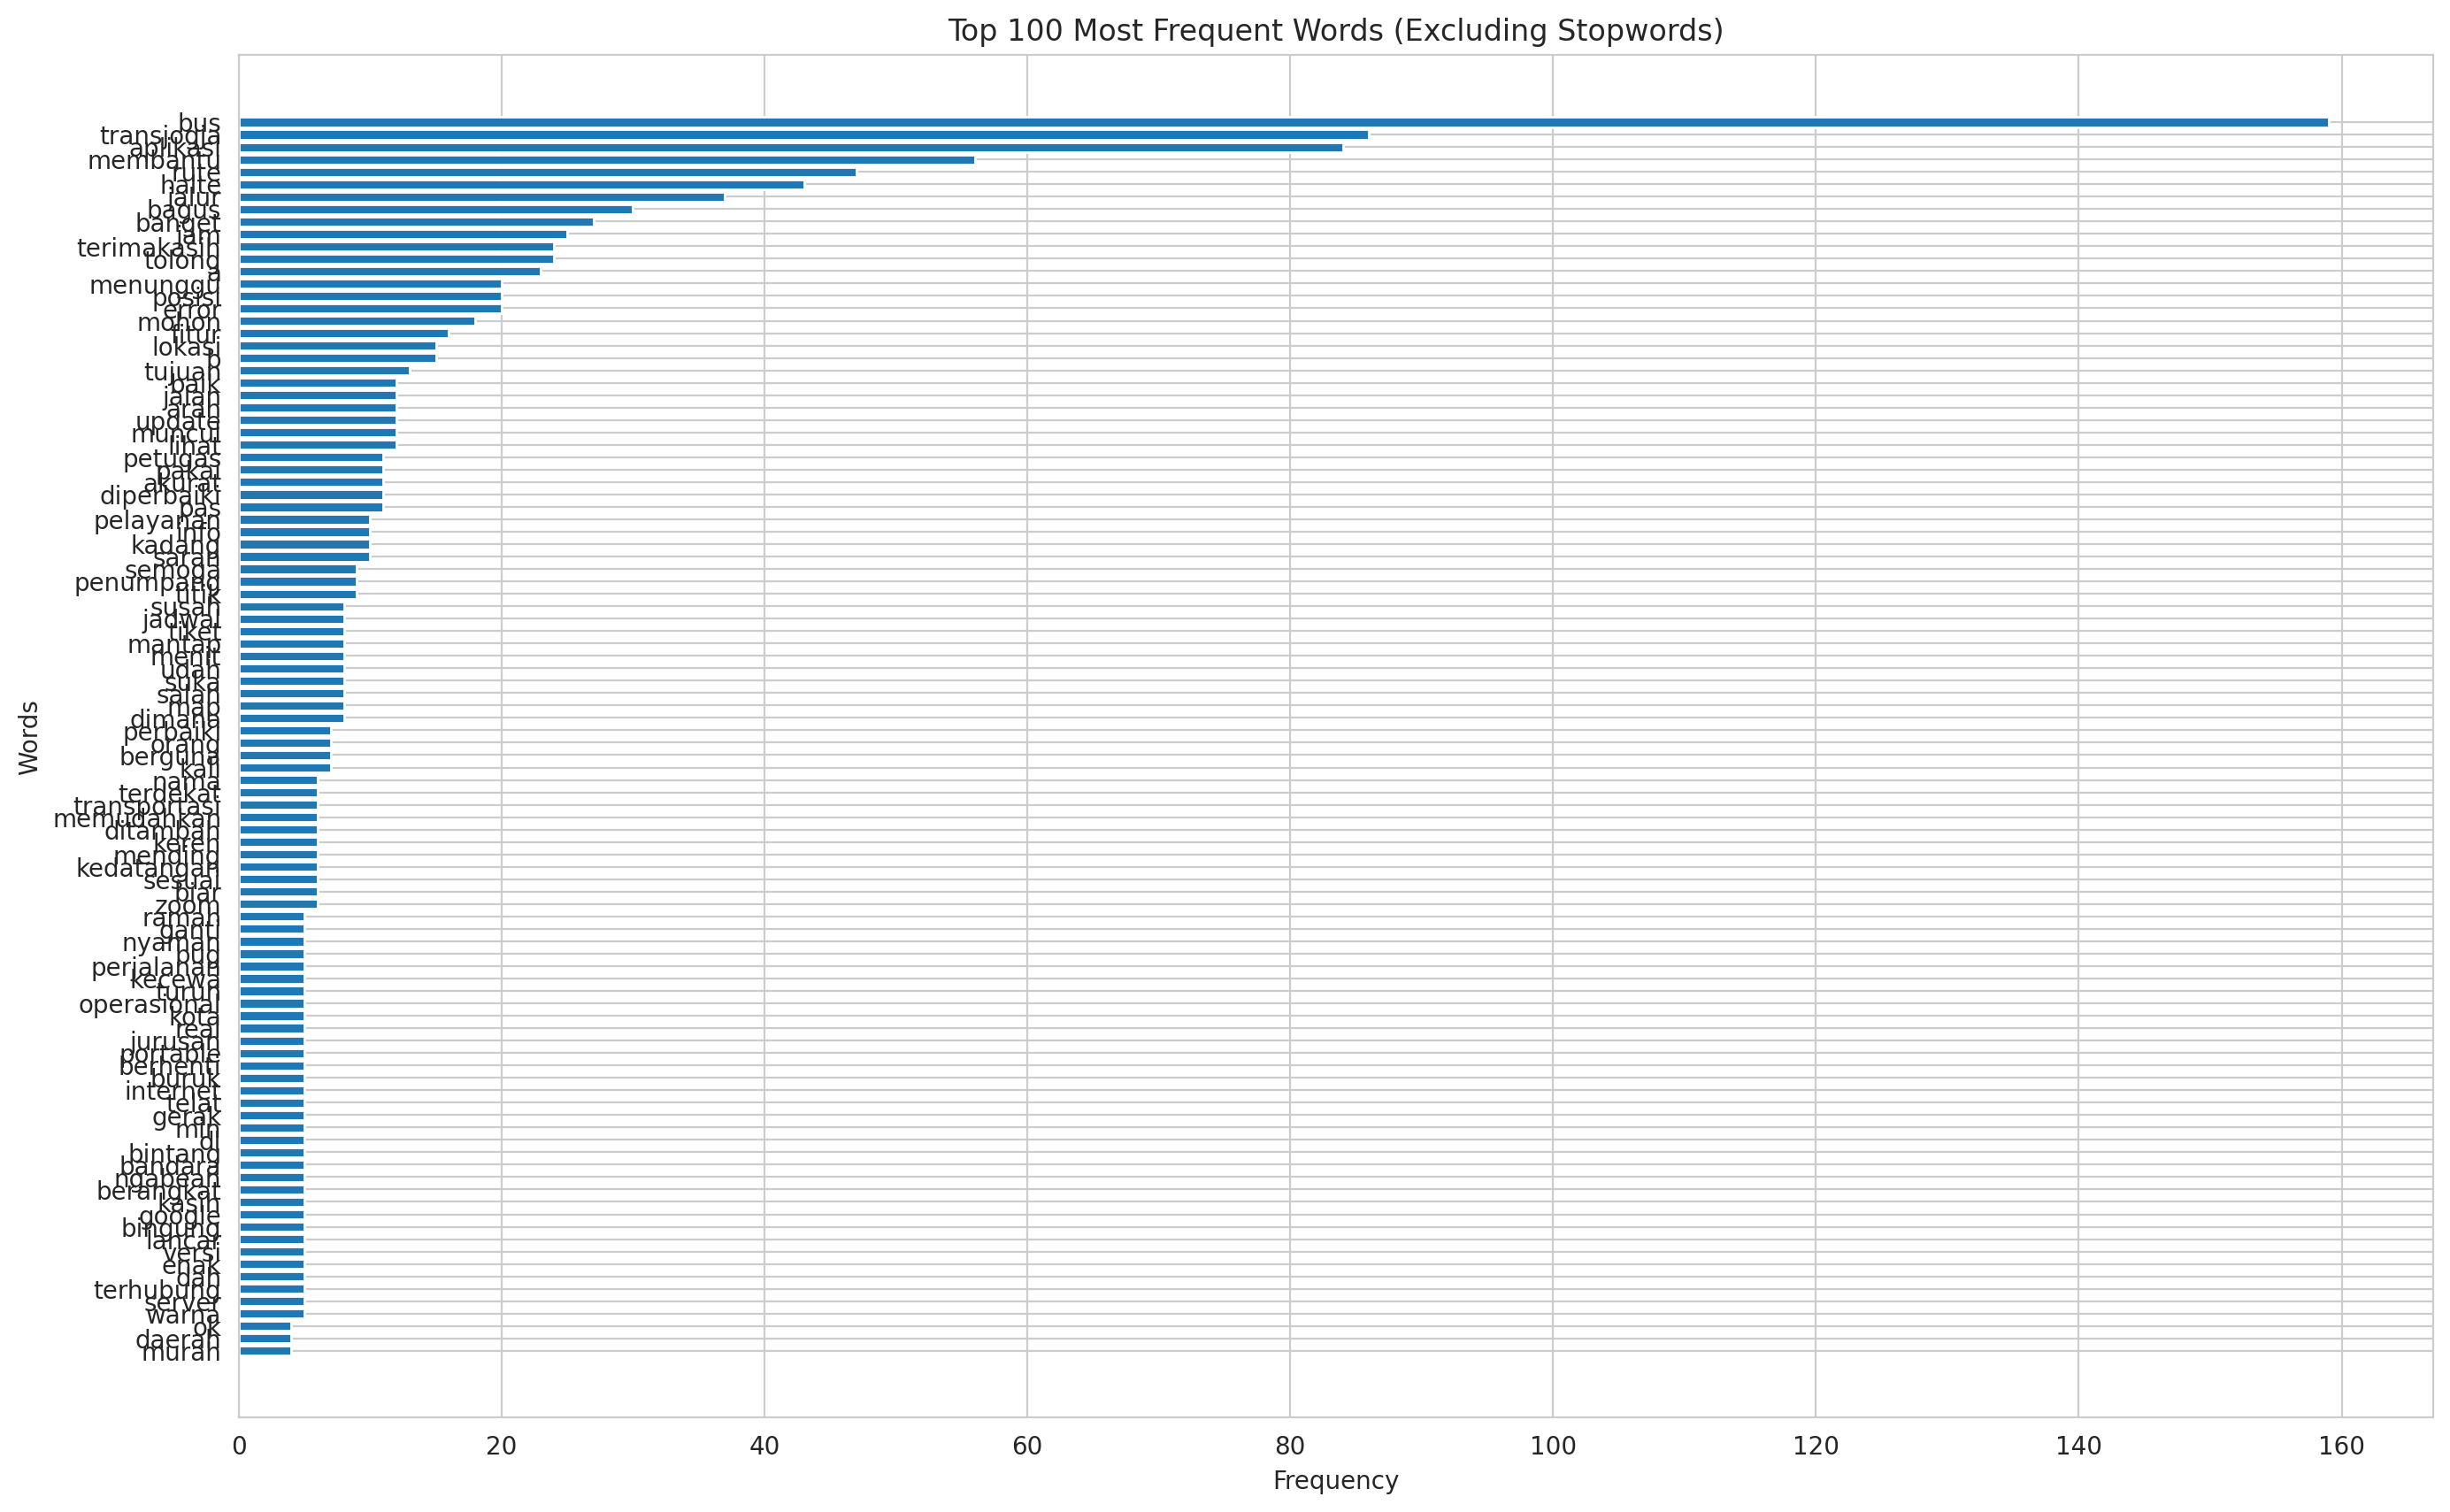

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming the text column is named 'content'
text_column = 'content'

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words
words = [word.lower() for word in all_text.split()]

# Cari kata yang kehapus karena stopwords
removed_words = [word for word in words if word in indonesian_stopwords]

# Hitung frekuensi kata yang kehapus
removed_counts = Counter(removed_words)
removed_df = pd.DataFrame(removed_counts.most_common(), columns=['Word', 'Frequency'])

print("Words removed by custom stopwords:")
display(removed_df)

# Filter stopwords
filtered_words = [word for word in words if word not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words with rainbow colormap (horizontal barplot)
plt.figure(figsize=(16, 10))

# generate warna rainbow sesuai jumlah kata
#colors = plt.cm.rainbow(np.linspace(0, 1, len(word_freq_df)))

# plot horizontal bar
bars = plt.barh(
    word_freq_df['Word'][::-1],
    word_freq_df['Frequency'][::-1],
    #color=colors
)

plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 100 Most Frequent Words (Excluding Stopwords)")
plt.show()

### Remove all stopwords

In [27]:
# fungsi untuk hapus stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.lower().split()
        return ' '.join([w for w in words if w not in indonesian_stopwords])
    return text

# bikin kolom baru di dataframe
df_transjog['clean_content'] = df_transjog['content'].apply(remove_stopwords)

# cek hasil
print(df_transjog[['content', 'clean_content']].head(10))

                                                                                                                                                                                        content  \
0                                                                     aplikasi nya ok tapi terkadang pelayanan masih kurang ramah terutama petugas perempuan apalagi kalau sudah mau ganti sift   
1                                                                                  sangat sangat membantu saya sebagai pendatang baru di daerah istimewa yogyakarta terimakasih atas bantuannya   
2                                                                                                                                                        sangat membantu mobilitas murah nyaman   
3  mau login saja susah karang suruh pakai email tapi waktu dimasukin nama email dan sandinya malah akun sudah ada di perangkat anda buat akun baru pun sama saja terus saja gitu sampai kiamat   
4                        

In [28]:

df_transjog['clean_tokens'] = df_transjog['tokens'].apply(
    lambda toks: [w for w in toks if w not in indonesian_stopwords]
)

In [29]:
# Liat 5 baris pertama
print(df_transjog[['content', 'tokens', 'clean_tokens']].head())

# Liat baris tertentu (misal index ke-100)
print(df_transjog[['content', 'tokens', 'clean_tokens']].iloc[100])

# Kalau mau tampil rapi (pake Pandas display)
import pandas as pd
pd.set_option('max_colwidth', 200)  # biar teksnya ga dipotong
display(df_transjog[['content', 'tokens', 'clean_tokens']].sample(5))

                                                                                                                                                                                        content  \
0                                                                     aplikasi nya ok tapi terkadang pelayanan masih kurang ramah terutama petugas perempuan apalagi kalau sudah mau ganti sift   
1                                                                                  sangat sangat membantu saya sebagai pendatang baru di daerah istimewa yogyakarta terimakasih atas bantuannya   
2                                                                                                                                                        sangat membantu mobilitas murah nyaman   
3  mau login saja susah karang suruh pakai email tapi waktu dimasukin nama email dan sandinya malah akun sudah ada di perangkat anda buat akun baru pun sama saja terus saja gitu sampai kiamat   
4                        

,content,tokens,clean_tokens
90,rute nya diupdate dong banyak bus yang rute nya beda sama di aplikasi,"[rute, nya, diupdate, dong, banyak, bus, yang, rute, nya, beda, sama, di, aplikasi]","[rute, diupdate, bus, rute, beda, aplikasi]"
96,lokasinya kadang tidak akurat di aps bus sudah deket posisi eh ternyata tidak gerak gerak bus nya saya lihat semua bus juga sama tidak ada yang bergerak padahal masih siang jam,"[lokasinya, kadang, tidak, akurat, di, aps, bus, sudah, deket, posisi, eh, ternyata, tidak, gerak, gerak, bus, nya, saya, lihat, semua, bus, juga, sama, tidak, ada, yang, bergerak, padahal, masih,...","[lokasinya, kadang, akurat, aps, bus, deket, posisi, eh, gerak, gerak, bus, lihat, bus, bergerak, siang, jam]"
35,real time sangat membantu,"[real, time, sangat, membantu]","[real, time, membantu]"
160,bapak kurang ramah saya nanya dicuekin berlagak amat kalau penumpang nanya dijawab jangan malah sibuk sendiri bapak bapak lho gimana sih tata krama tidak ada terminal congcat,"[bapak, kurang, ramah, saya, nanya, dicuekin, berlagak, amat, kalau, penumpang, nanya, dijawab, jangan, malah, sibuk, sendiri, bapak, bapak, lho, gimana, sih, tata, krama, tidak, ada, terminal, co...","[ramah, nanya, dicuekin, berlagak, penumpang, nanya, sibuk, gimana, tata, krama, terminal, congcat]"
66,tolong dong yang di tpb letjen suprapto deket rs gedong tengen rute nya di perjelas lagi masa iya semua muncul sampai yang di arah lain muncul saya udah kebiasaan menunggu disitu habis pulang kamp...,"[tolong, dong, yang, di, tpb, letjen, suprapto, deket, rs, gedong, tengen, rute, nya, di, perjelas, lagi, masa, iya, semua, muncul, sampai, yang, di, arah, lain, muncul, saya, udah, kebiasaan, men...","[tolong, tpb, letjen, suprapto, deket, rs, gedong, tengen, rute, perjelas, iya, muncul, arah, muncul, udah, kebiasaan, menunggu, disitu, habis, pulang, kampus, php, bus, muncul]"


## STEMMING/LEMMATIZATION

### Install Sastrawi

In [30]:

!pip install sastrawi

### Inisialisasi, apply, cek

In [31]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Apply stemming ke clean_tokens
df_transjog['stemmed_tokens'] = df_transjog['clean_tokens'].apply(
    lambda toks: [stemmer.stem(w) for w in toks]
)

# Kalau mau bikin string lagi (buat TF-IDF atau ML klasik)
df_transjog['final_text'] = df_transjog['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Cek hasil
print(df_transjog[['content', 'clean_tokens', 'stemmed_tokens', 'final_text']].head())

                                                                                                                                                                                        content  \
0                                                                     aplikasi nya ok tapi terkadang pelayanan masih kurang ramah terutama petugas perempuan apalagi kalau sudah mau ganti sift   
1                                                                                  sangat sangat membantu saya sebagai pendatang baru di daerah istimewa yogyakarta terimakasih atas bantuannya   
2                                                                                                                                                        sangat membantu mobilitas murah nyaman   
3  mau login saja susah karang suruh pakai email tapi waktu dimasukin nama email dan sandinya malah akun sudah ada di perangkat anda buat akun baru pun sama saja terus saja gitu sampai kiamat   
4                        

### Cek kolom, gabung

In [32]:
# Kolom penting dari review
important_cols = ["content", "score", "thumbsUpCount",
                  "reviewCreatedVersion", "at",
                  "replyContent", "repliedAt"]

# Kolom hasil preprocessing
preproc_cols = ["tokens", "clean_tokens", "stemmed_tokens", "final_text"]

# Gabung jadi satu
df_preview = df_transjog.loc[:, important_cols + preproc_cols]

# Biar teks ga kepotong
import pandas as pd
pd.set_option('max_colwidth', 150)

# Tampilkan sample 5 row
display(df_preview.sample(5))

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,tokens,clean_tokens,stemmed_tokens,final_text
216,bagus,5,0,None,2022-10-25 06:22:24,None,NaT,[bagus],[bagus],[bagus],bagus
217,benerin dulu deh semuanya,1,0,2.1.3,2022-10-22 04:52:12,None,NaT,"[benerin, dulu, deh, semuanya]",[benerin],[benerin],benerin
228,harus menunggu lama,3,0,2.0.9,2022-09-10 09:10:04,None,NaT,"[harus, menunggu, lama]",[menunggu],[tunggu],tunggu
296,kalau bisa tambahin jadwal jam keberangkatan dong tapi sejauh ini sudah sangat membantu sih,4,3,1.0.6,2021-04-08 03:06:32,None,NaT,"[kalau, bisa, tambahin, jadwal, jam, keberangkatan, dong, tapi, sejauh, ini, sudah, sangat, membantu, sih]","[tambahin, jadwal, jam, keberangkatan, membantu]","[tambahin, jadwal, jam, berangkat, bantu]",tambahin jadwal jam berangkat bantu
70,sangat membatu,5,0,2.3.0,2025-02-28 03:44:52,None,NaT,"[sangat, membatu]",[membatu],[batu],batu


### Simpan csv clean

In [33]:

# CLEAN data (lengkap dengan preprocessing)
df_transjog_clean = df_transjog.loc[:, [
    "content", "score", "thumbsUpCount", "reviewCreatedVersion", "at",
    "replyContent", "repliedAt", "tokens", "clean_tokens", "stemmed_tokens", "final_text"
]]
df_transjog_clean.to_csv("df_transjog_clean.csv", index=False)